# Пример полного решения задачи математической статистики

## Загрузка данных

У нас имеется некоторая выборка в файле example_data.csv. Загрузим эти данные с помощью библиотеки Pandas:

In [2]:
import pandas as pd

data = pd.read_csv('example_data.csv')
display(data.head()) # вывод первых 5 элементов

,X
0,20.8346
1,18.1454
2,21.4740
3,25.1812
4,17.7393


Итак, нам дана случайная выборка $X$, которую мы запишем в переменную $X$:

In [3]:
X = data['X'].values
print(X)

[20.8346 18.1454 21.474  25.1812 17.7393 17.7394 25.4191 21.9812 16.7427
 21.0288 16.7684 16.7586 19.7557 10.6281 11.4258 16.3497 14.4416 20.0619
 14.8854 12.7498 24.9382 17.7748 19.017  12.697  16.4255 19.2008 13.8564
 20.3221 16.1872 17.4956 16.1827 26.5756 18.6738 14.2515 22.2146 13.5606
 19.6156 10.4316 13.106  19.5647 21.8585 19.4568 18.2412 17.4558 12.4693
 15.6824 16.7801 23.208  20.1863 11.2643]


Выборка $X$ состоит из действительных значений. Следовательно, она поступила из непрерывного распределения. Посмотрим количество значений в выборке

In [4]:
n = X.size
print(n)

50


Таким образом, в выборке $50$ элементов.

## Построение ЭФР и гистограммы
Используя эмпирическую функцию распределения (выборочный аналог функции распределения) и гистограмму (выборочный аналог плотности распределения вероятностей) попытаемся оценить форму распределения.

Для эмпирической функции распределения возьмем функцию, которую мы построили на первом занятии по мат.статистике:

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def cdf(random_sample):
    n = len(random_sample)
    var_series = sorted(random_sample)
    x_values = np.concatenate(([-np.inf], var_series, [np.inf]))  # границы
    y_values = np.arange(0, n + 1) / n  # значения ЭФР

    x_plot = []
    y_plot = []

    for i in range(len(var_series)):
        x_plot.extend([var_series[i], var_series[i]])
        y_plot.extend([y_values[i], y_values[i + 1]])

    x_plot = [x_values[0]] + x_plot + [x_values[-1]]
    y_plot = [0] + y_plot + [1]

    plt.figure(figsize=(8, 6))
    plt.step(x_plot, y_plot, where='post', label="Эмпирическая функция распределения")
    plt.title("Эмпирическая функция распределения")
    plt.xlabel("x")
    plt.ylabel("F_n(x)")
    plt.grid()
    plt.show()

Построим для нашей выборки эмпирическую функцию распределения

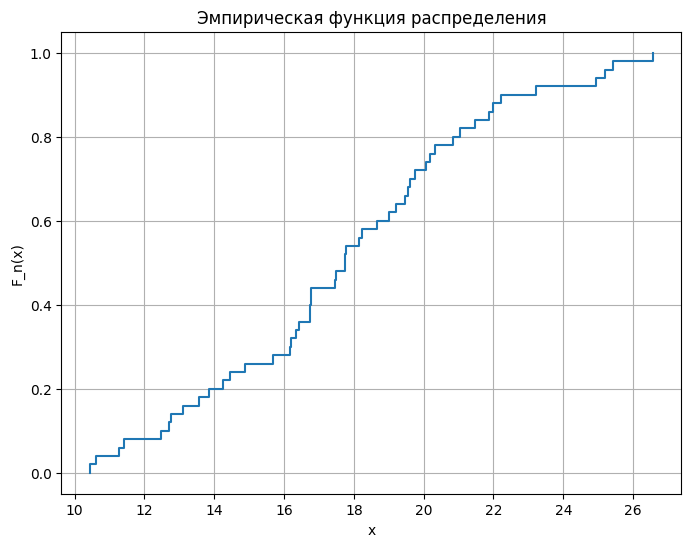

In [ ]:
cdf(X)

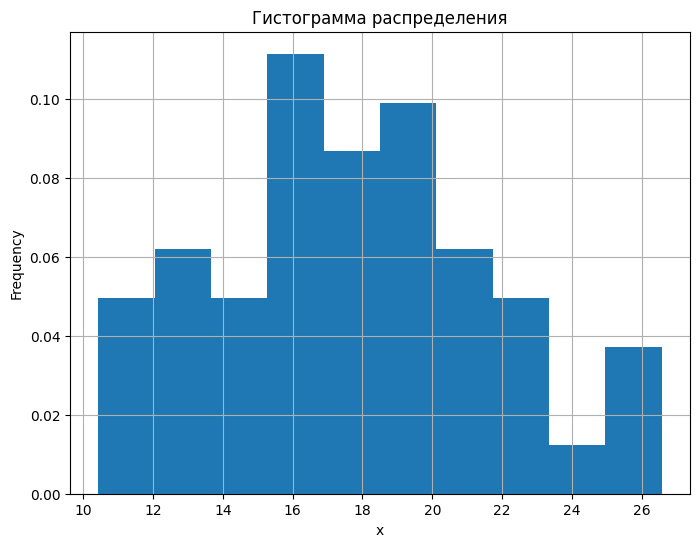

In [ ]:
def hist(data):
    plt.figure(figsize=(8, 6))
    plt.hist(data, density=True)
    plt.title("Гистограмма распределения")
    plt.xlabel("x")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

hist(X)

Вспомним вид плотностей распределения и функций распределения классических распределений
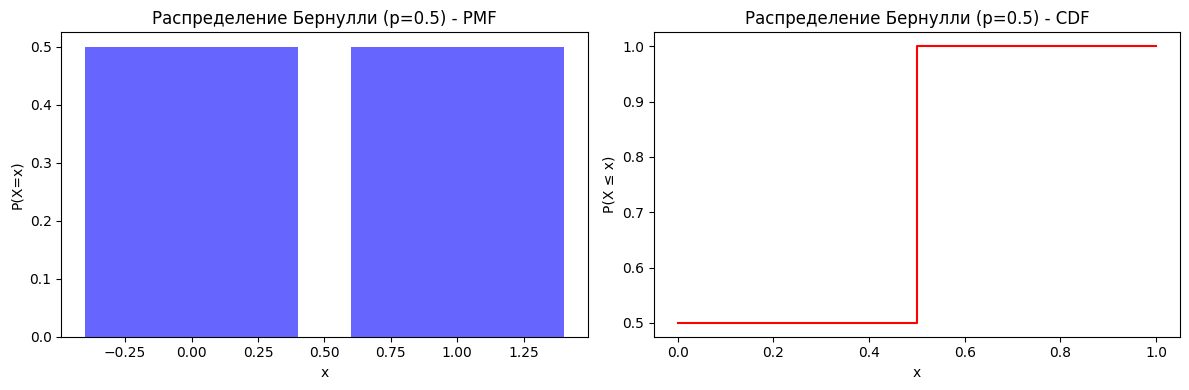
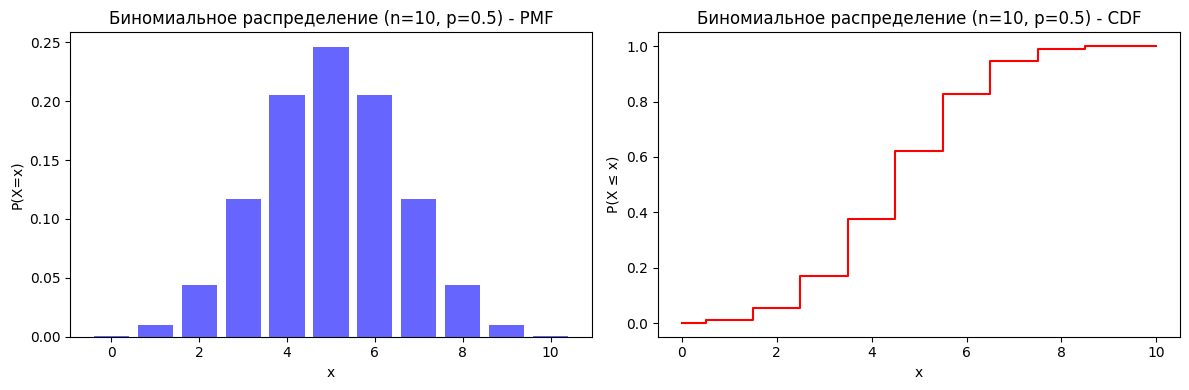
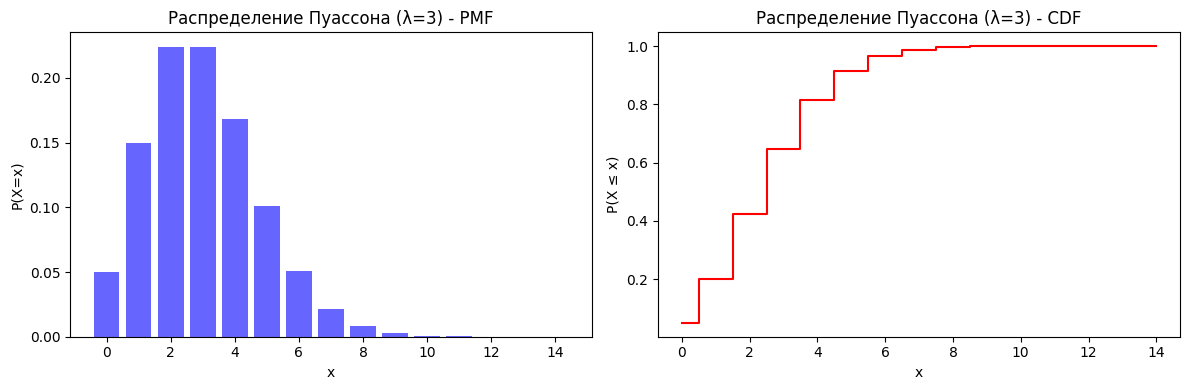
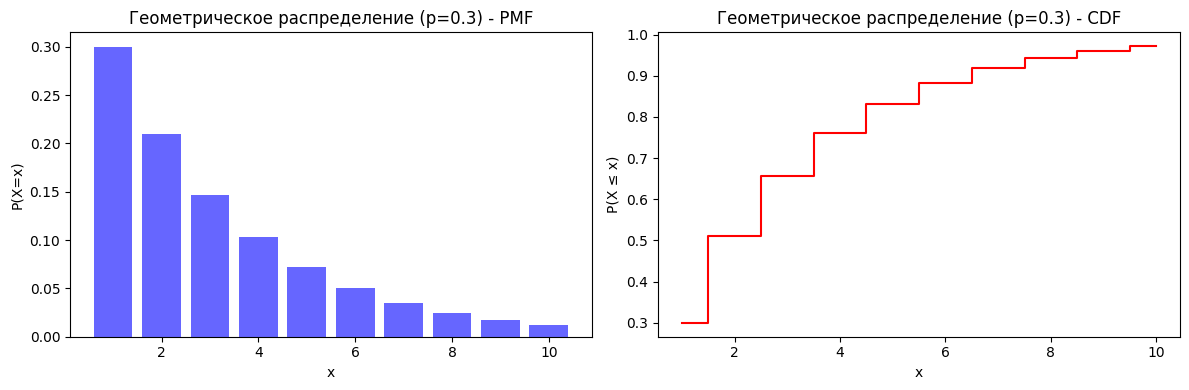
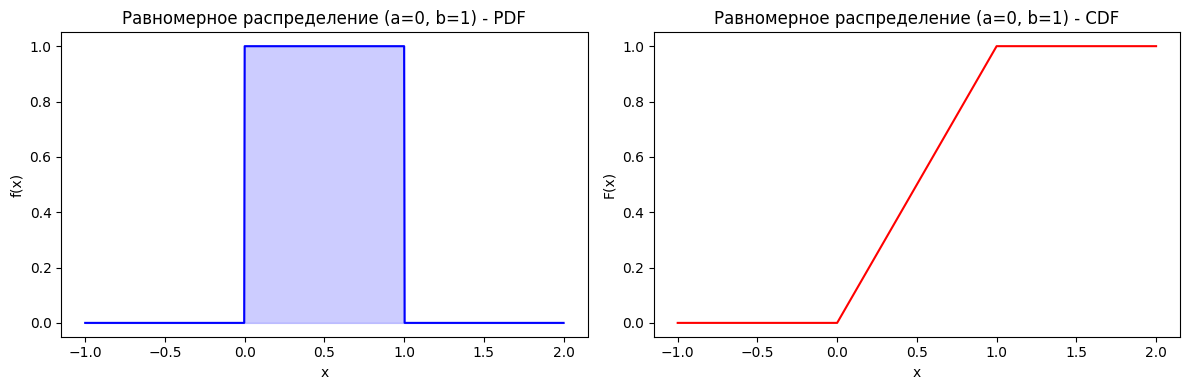
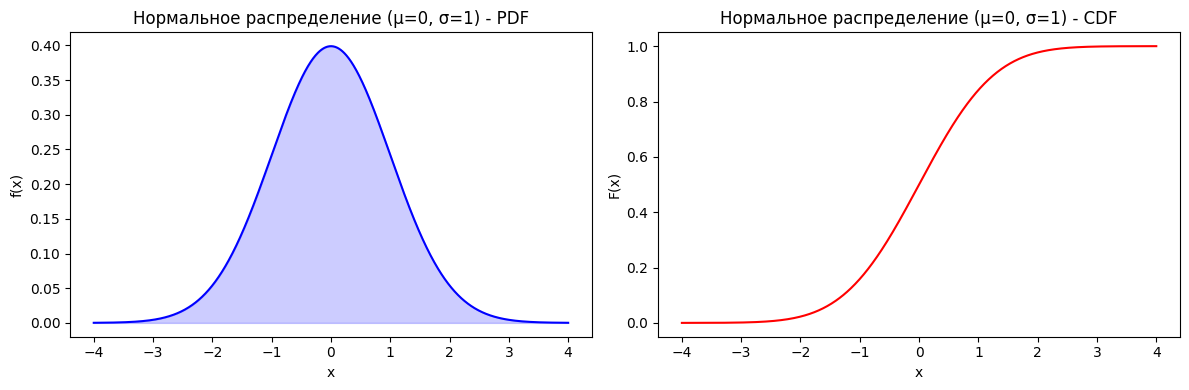
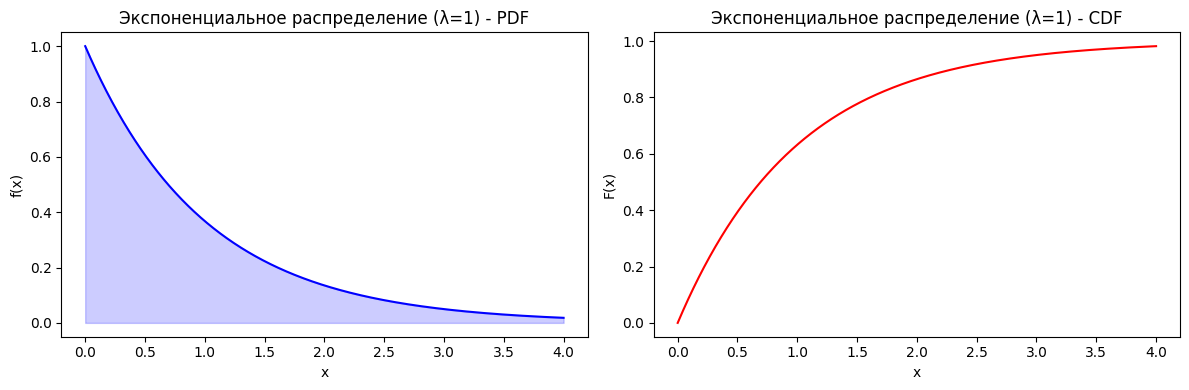

Поскольку мы предполагаем, что случайная выборка пришла из непрерывного распределения, то у нас остается выбор между нормальным, экспоненциальным и равномерным распределением. Очевидно, что построенные нами графики больше всего напоминают нормальное распределение.

Таким образом, мы предполагаем, что выборка пришла из некоторого нормального распределения
$$X \sim \mathcal N(\mu, \sigma)$$
с плотностью
$$p_\xi(x) = \dfrac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}},$$
где $\mu$ и $\sigma$ -- это неизвестные параметры.

## Построение точечных оценок методом максимального правдоподобия
Используя метод максимального правдоподобия, построим точечные оценки для параметров распределения (они сразу получатся состоятельными и эффективными). Для этого зададим функцию правдоподобия
$$L(X, \mu, \sigma) = \prod\limits_{k=1}^n \dfrac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x_k-\mu)^2}{2\sigma^2}} = \dfrac{1}{(\sigma \sqrt{2\pi})^n}e^{-\frac{\sum_{k=1}^n(x_k-\mu)^2}{2\sigma^2}}.$$
Чтобы было удобнее максимизировать эту функцию, найдем логарифм правдоподобия
$$\ln L(X, \mu, \sigma) = -n \ln (\sigma \sqrt{2\pi}) -\dfrac{\sum\limits_{k=1}^n(x_k-\mu)^2}{2\sigma^2}.$$
Нам нужно решить задачу
$$\ln L(X, \mu, \sigma) \to \underset{\mu,\sigma}\max,$$
для этого возьмем частные производные от логарифма правдоподобия по параметрам $\mu$, $\sigma$
$$\dfrac{\partial \ln L(X, \mu, \sigma)}{\partial \mu} = \dfrac{\sum\limits_{k=1}^n(x_k-\mu)}{\sigma^2} = 0,$$
отсюда
$$\sum\limits_{k=1}^n(x_k-\mu) = \sum\limits_{k=1}^nx_k-n\mu = 0,$$
а тогда
$$\hat\mu = \dfrac{1}{n}\sum\limits_{k=1}^nx_k.$$
Аналогично
$$\dfrac{\partial \ln L(X, \mu, \sigma)}{\partial \sigma} = -\dfrac{n}{\sigma}+\dfrac{\sum\limits_{k=1}^n(x_k-\mu)}{\sigma^3} = 0,$$
отсюда
$$\hat\sigma^2 = \dfrac{\sum\limits_{k=1}^n(x_k-\mu)}{n}.$$
Чтобы найденные значения $\mu,\sigma$ давали максимум функции $\ln L(X, \mu, \sigma)$ необходимо, чтобы матрица вторых производных была отрицательно определенной
$$\begin{pmatrix}
\dfrac{\partial^2 \ln L(X, \mu, \sigma)}{\partial \mu^2} & \dfrac{\partial^2 \ln L(X, \mu, \sigma)}{\partial \mu\partial \sigma} \\[2ex]
\dfrac{\partial^2 \ln L(X, \mu, \sigma)}{\partial \sigma \partial \mu} & \dfrac{\partial^2 \ln L(X, \mu, \sigma)}{\partial \sigma^2}
\end{pmatrix} < 0.$$
Вычислив вторые производные, можно легко убедиться в том, что это верно. Таким образом, мы получили оценки для параметров нормального распределения
$$\hat\mu = \overline x =\dfrac{1}{n}\sum\limits_{k=1}^nx_k,\ \hat\sigma^2 =S^2= \dfrac{\sum\limits_{k=1}^n(x_k-\mu)}{n},$$
которые совпадают с выборочными оценками среднего и дисперсии. При этом нам известно, что оценка для $\mu$ несмещенная, а оценка для $\sigma^2$ смещенная.

Итак, найдем значения построенных оценок

In [6]:
mean = np.mean(X)
print('Среднее =', mean)

Среднее = 17.776094


In [7]:
var = np.var(X)
print('Смещенная дисперсия =', var)

Смещенная дисперсия = 15.322865781764


In [8]:
unbiased_var = np.var(X, ddof=1)
print('Несмещенная дисперсия =', unbiased_var)

Несмещенная дисперсия = 15.63557732833061


## Построение доверительных интервалов для параметров распределения

Построим доверительные интервалы для этих параметров. Для этого зададим доверительный уровень $99\%$

In [9]:
confidence_level = 0.99
epsilon = 1 - confidence_level

Вспомним, что для случая с неизвестной дисперсией, но выборкой $n > 30$ мы строим доверительные интервалы для среднего в виде
$$\overline x - \Phi\left(1-\dfrac \varepsilon 2\right) \cdot \sqrt{\dfrac{S_n^2}{n}}\leqslant \overline x \leqslant \overline x + \Phi\left(1-\dfrac \varepsilon 2\right) \cdot \sqrt{\dfrac{S_n^2}{n}},$$
где $S_n$ -- несмещенная оценка дисперсии
$$S_n^2 = \dfrac{1}{n-1}\sum_{k=1}^n (x_k - \overline x),$$
а $\Phi(\cdot)$ -- функция распределения $\mathcal N (0,1)$.

Тогда доверительный интервал для среднего равен

In [ ]:
from scipy.stats import norm, chi2

Phi = norm.ppf(1 - epsilon / 2)
margin_of_error = Phi * np.sqrt(unbiased_var/n)
ci_mean = (mean - margin_of_error, mean + margin_of_error)

print(f"Доверительный интервал для среднего: {ci_mean}")

Доверительный интервал для среднего: (16.335674346768727, 19.216513653231274)


Доверительный интервал для дисперсии мы изем по формуле
$$\dfrac{S_n^2\cdot(n-1)}{\chi^2_{n-1, 1-\frac {\varepsilon} {2}}}\leqslant S_n^2 \leqslant \dfrac{S_n^2\cdot (n-1)}{\chi^2_{n-1, \frac \varepsilon 2}}.$$
Тогда он равен

In [ ]:
chi2_lower = chi2.ppf(1 - epsilon / 2, df=n - 1)
chi2_upper = chi2.ppf(epsilon / 2, df=n - 1)
ci_variance = ((n - 1) * unbiased_var / chi2_lower, (n - 1) * unbiased_var / chi2_upper)

print(f"Доверительный интервал для дисперсии: {ci_variance}")

Доверительный интервал для дисперсии: (9.793383031113716, 28.116021675680283)


Визуализируем полученные интервалы

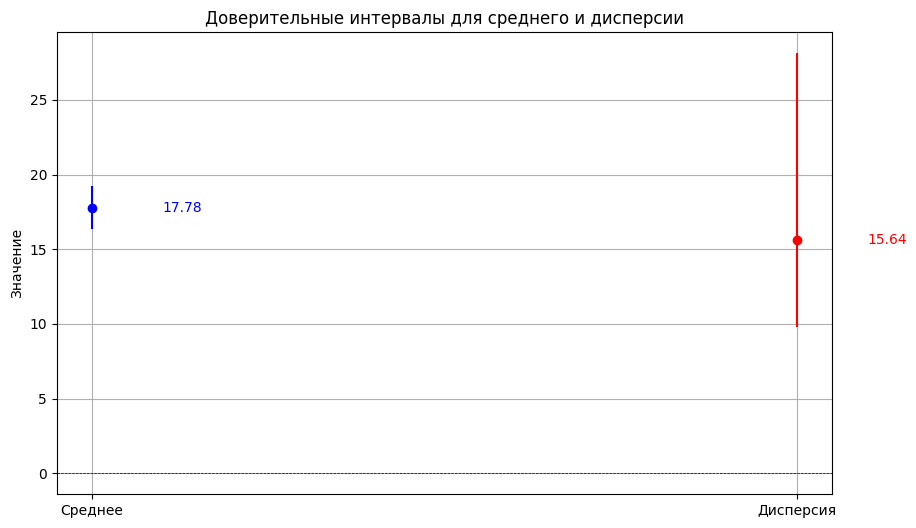

In [ ]:
plt.figure(figsize=(10, 6))

plt.errorbar(1, mean, yerr=[[mean - ci_mean[0]], [ci_mean[1] - mean]], fmt='o', label='Среднее', color='blue')
plt.text(1.1, mean, f'{mean:.2f}', verticalalignment='center', color='blue')

plt.errorbar(2, unbiased_var, yerr=[[unbiased_var - ci_variance[0]], [ci_variance[1] - unbiased_var]], fmt='o', label='Дисперсия', color='red')
plt.text(2.1, unbiased_var, f'{unbiased_var:.2f}', verticalalignment='center', color='red')

plt.xticks([1, 2], ['Среднее', 'Дисперсия'])
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.title('Доверительные интервалы для среднего и дисперсии')
plt.ylabel('Значение')
plt.grid()
plt.show()

Таким образом, мы примерно понимаем пределы погрешности построенных нами точечных оценок.

## Тестирование статистических гипотез о распределении

Выдвинем две гипотезы
$$H_0 : \{\text{выборка имеет нормальное распределение с параметрами } \mu = 17.776,\ \sigma^2 = 15.635\},$$
$$H_1 = \overline H_0 : \{\text{выборка имеет не нормальное распределение}\}.$$

Для проверки этих гипотез воспольземся критерием согласия Колмогорова:

In [ ]:
from scipy.stats import kstest, norm

theoretical_distribution = norm(loc=mean, scale=np.sqrt(unbiased_var)) # моделируем нормальное распределение, подставляя в качестве параметров построенные нами оценки

statistic, p_value = kstest(X, theoretical_distribution.cdf)

print(f"P-значение: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Гипотеза о нормальном распределении отклоняется.")
else:
    print("Гипотеза о нормальном распределении принимается.")

P-значение: 0.9800824406683849
Гипотеза о нормальном распределении принимается.


Для того, чтобы закрепить наши предположения, проверим гипотезу с помощью критерия Шапиро-Уилка

In [ ]:
from scipy.stats import shapiro


statistic, p_value = shapiro(X)

print(f"P-значение: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Гипотеза о нормальном распределении отклоняется.")
else:
    print("Гипотеза о нормальном распределении принимается.")

P-значение: 0.6722041229985368
Гипотеза о нормальном распределении принимается.


Таким образом, мы можем заключить, что выборка пришла из нормального распределения с параметрами $\mu = 17.776,\ \sigma^2 = 15.635$ с учетом доверительных интервалов
$$\mu \in [16.335, 19.216],\ \sigma^2 \in [9.793, 28.116].$$

В реальности е